In [28]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [16]:
df = pd.read_csv("./data/EH_rapm_sk_stats_ev_regular_2023-04-25.csv")
df = df.sort_values(by=['EH_ID', 'Season'])
df.reset_index(drop= True)
df

,Player,EH_ID,API ID,Season,Team,Position,Shoots,Birthday,Age,Draft Yr,...,TOI,G±/60,xG±/60,C±/60,GF/60,GA/60,xGF/60,xGA/60,CF/60,CA/60
0,A.J. Greer,A.J..GREER,8478421,16-17,COL,L,L,1996-12-14,19,2015,...,63.80,-0.021,0.117,1.70,-0.021,0.000,0.056,-0.061,0.77,-0.92
1,A.J. Greer,A.J..GREER,8478421,17-18,COL,L,L,1996-12-14,20,2015,...,122.27,0.035,-0.107,-3.43,-0.018,-0.052,-0.062,0.045,-2.45,0.98
2,A.J. Greer,A.J..GREER,8478421,18-19,COL,L,L,1996-12-14,21,2015,...,93.80,-0.038,-0.001,0.36,-0.032,0.006,0.001,0.002,-0.70,-1.06
3,A.J. Greer,A.J..GREER,8478421,21-22,N.J,L,L,1996-12-14,24,2015,...,70.45,0.003,0.052,1.66,-0.004,-0.008,0.007,-0.045,0.51,-1.14
4,A.J. Greer,A.J..GREER,8478421,22-23,BOS,L,L,1996-12-14,25,2015,...,543.37,0.054,0.295,1.11,-0.056,-0.110,0.116,-0.179,-2.01,-3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12710,Zenon Konopka,ZENON.KONOPKA,8469820,09-10,T.B,C,L,1981-01-02,28,1999,...,571.28,-0.115,-0.104,-1.37,-0.138,-0.023,-0.202,-0.098,-3.99,-2.62
12711,Zenon Konopka,ZENON.KONOPKA,8469820,10-11,NYI,C,L,1981-01-02,29,1999,...,683.27,-0.167,-0.303,-6.82,-0.137,0.030,-0.181,0.122,-4.30,2.52
12712,Zenon Konopka,ZENON.KONOPKA,8469820,11-12,OTT,C,L,1981-01-02,30,1999,...,373.65,-0.087,-0.135,-4.17,-0.134,-0.047,-0.165,-0.030,-3.68,0.49
12713,Zenon Konopka,ZENON.KONOPKA,8469820,12-13,MIN,C,L,1981-01-02,31,1999,...,302.82,-0.110,-0.215,-3.65,-0.195,-0.085,-0.234,-0.019,-4.07,-0.42


In [22]:
current_G = []
next_G = []
current_GF = []
next_GF = []
age = []

### Can be done with comparing df[1:] and df[:-1]

# for i in range(len(df) -1):
#     if df.iloc[i]['EH_ID'] != df.iloc[i+1]['EH_ID']:
#         continue
        
#     current_G.append(df.iloc[i]['G±/60'])
    
#     print(i, df.iloc[i])
#     break
    
    

current_yr = df.iloc[:-1].reset_index(drop=True)
next_yr = df.iloc[1:].reset_index(drop=True)
current_yr, next_yr

print(current_yr.index.is_monotonic_increasing, next_yr.index.is_monotonic_increasing)

# current_yr['EH_ID'], next_yr['EH_ID']
current_yr.index == next_yr.index
combo_current = current_yr[current_yr['EH_ID'] == next_yr['EH_ID']]
combo_next = next_yr[current_yr['EH_ID'] == next_yr['EH_ID']]



True True


0.19244942484560737 0.0031151864000820637 0.03596553610791491 1.9916441438821923e-83 0.00985392399006976


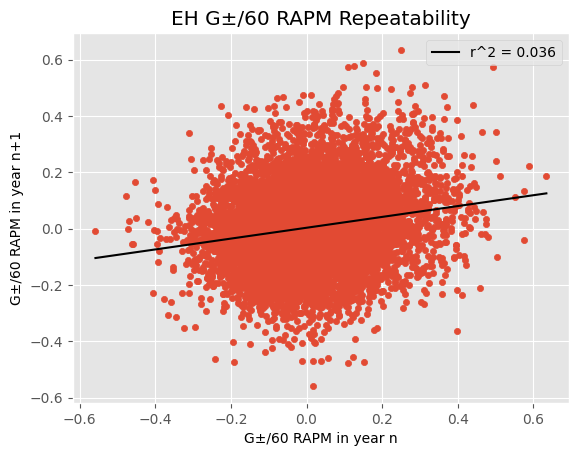

In [31]:
slope, intercept, r_value, p_value, std_err = linregress(combo_current['G±/60'], combo_next['G±/60'])
print(slope, intercept, r_value**2, p_value, std_err)
N = combo_current['G±/60'].max()
min_ = combo_current['G±/60'].min()
xseq = np.linspace(min_, N, num=2)


plt.style.use('ggplot')

plt.title("EH G±/60 RAPM Repeatability")
plt.ylabel("G±/60 RAPM in year n+1")
plt.xlabel("G±/60 RAPM in year n")
plt.scatter(combo_current['G±/60'], combo_next['G±/60'], s= 20)
# plt.scatter(team_df.xs('2022/23')['iceTime'], team_df.xs('2022/23')['Injury Count'], s= 20, color='blue', label='2022/23')

plt.plot(xseq, intercept+slope*xseq, color='k', label="r^2 = {:.3f}".format(r_value**2))
plt.legend()
plt.show()

0.356120236567907 6.327005287585629e-05 0.12403497107883237 2.1999186951453477e-296 0.009359605458778534


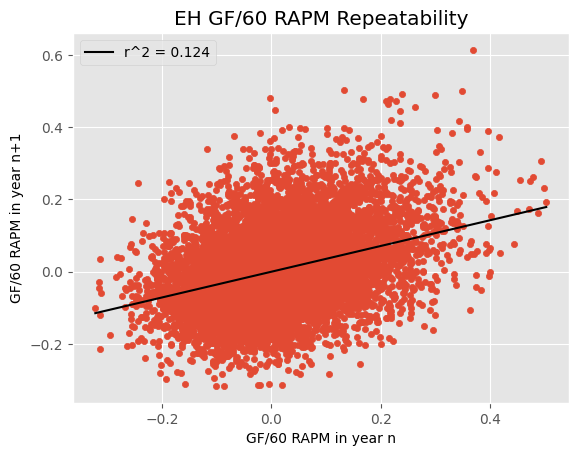

In [32]:
slope, intercept, r_value, p_value, std_err = linregress(combo_current['GF/60'], combo_next['GF/60'])
print(slope, intercept, r_value**2, p_value, std_err)
N = combo_current['GF/60'].max()
min_ = combo_current['GF/60'].min()
xseq = np.linspace(min_, N, num=2)


plt.style.use('ggplot')

plt.title("EH GF/60 RAPM Repeatability")
plt.ylabel("GF/60 RAPM in year n+1")
plt.xlabel("GF/60 RAPM in year n")
plt.scatter(combo_current['GF/60'], combo_next['GF/60'], s= 20)
# plt.scatter(team_df.xs('2022/23')['iceTime'], team_df.xs('2022/23')['Injury Count'], s= 20, color='blue', label='2022/23')

plt.plot(xseq, intercept+slope*xseq, color='k', label="r^2 = {:.3f}".format(r_value**2))
plt.legend()
plt.show()